# Lower Federal Court Opinions Missing Data

Outlined below are two considered methods for obtaining the inference set for the lower courts. Imputing with `judges` retains some inference rows, but is more difficult to parse since it contains more than one judge, and each judge's specific opinion is ambiguous. **UPDATE: In the final official version of the inference data, the decision was made to keep only those imputed `judges` rows that had only one judge/value in `judges`.**

Lower Court Data Filtering Method 1: No impution

1. Lower Court and `date_filed` >= 1930-01-01 and `type` in types: 7813912 rows

2. `author_str` or `author_id` documented: 3468128 rows

3. Opinion text documented: 3467665 rows

4. `token_count` >= 35: 3356065 rows

Lower Court Data Filtering Method 2: Try to impute `judges` from `clusters`

1. Lower Court and `date_filed` >= 1930-01-01 and `type` in types: 7813912 rows

2. `author_str`, `author_id`, or `judges` documented: 4549268 rows

3. Opinion text documented: 4548384 rows

4. `token_count` >= 35: 4260649 rows



## Missing Author: `author`, `author_id`, `author_str`

For all of the lower court cases, which ones were missing author(judge) information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
chunk1 = pd.read_csv('/scratch/amh9750/capstone/lc_opinions_no_text_chunk_0.csv')

/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (14,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
chunk2 = pd.read_csv('/scratch/amh9750/capstone/lc_opinions_no_text_chunk_1.csv')

In [4]:
lower_court = pd.concat([chunk1, chunk2], ignore_index=True)
lower_court

,resource_uri,id,absolute_url,cluster_id,cluster,author_id,author,joined_by,date_created,date_modified,author_str,per_curiam,joined_by_str,type,sha1,page_count,download_url,local_path,extracted_by_ocr,opinions_cited
0,NaN,7347153,NaN,7427349,NaN,NaN,NaN,NaN,2022-07-26 01:06:24.86499+00,2022-07-26 01:06:24.865016+00,Clement,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
1,NaN,7342188,NaN,7422498,NaN,NaN,NaN,NaN,2022-07-26 00:00:38.052671+00,2022-07-26 00:25:00.036782+00,NaN,f,NaN,010combined,5d34144503b3937cfec2fea18ad65be2fd45ed2d,29.0,http://www.ca5.uscourts.gov/opinions/pub/21/21...,pdf/2022/07/25/e.t._v._paxton.pdf,f,NaN
2,NaN,7842667,NaN,7895213,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.648524+00,2022-09-08 17:04:01.648545+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
3,NaN,7842668,NaN,7895214,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.724868+00,2022-09-08 17:04:01.724888+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
4,NaN,7842669,NaN,7895215,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.85312+00,2022-09-08 17:04:01.853145+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813907,NaN,7842663,NaN,7895209,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.288853+00,2022-09-08 17:04:01.288871+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
7813908,NaN,7842664,NaN,7895210,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.394333+00,2022-09-08 17:04:01.394358+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
7813909,NaN,7842666,NaN,7895212,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.490544+00,2022-09-08 17:04:01.490566+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
7813910,NaN,7925088,NaN,7972615,NaN,NaN,NaN,NaN,2022-09-08 22:32:29.621073+00,2022-09-08 22:32:29.621086+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN


In [5]:
lower_court.count()

resource_uri              0
id                  7813912
absolute_url              0
cluster_id          7813912
cluster                   0
author_id           1118201
author                    0
joined_by                 0
date_created        7813912
date_modified       7813912
author_str          2910139
per_curiam          7813912
joined_by_str             0
type                7813912
sha1                4329008
page_count          1469623
download_url        2311833
local_path          2228776
extracted_by_ocr    7813912
opinions_cited            0
dtype: int64

In [6]:
lower_court_no_author = lower_court[lower_court['author_str'].isnull() & lower_court['author_id'].isnull() & lower_court['author'].isnull()]
lower_court_no_author

,resource_uri,id,absolute_url,cluster_id,cluster,author_id,author,joined_by,date_created,date_modified,author_str,per_curiam,joined_by_str,type,sha1,page_count,download_url,local_path,extracted_by_ocr,opinions_cited
1,NaN,7342188,NaN,7422498,NaN,NaN,NaN,NaN,2022-07-26 00:00:38.052671+00,2022-07-26 00:25:00.036782+00,NaN,f,NaN,010combined,5d34144503b3937cfec2fea18ad65be2fd45ed2d,29.0,http://www.ca5.uscourts.gov/opinions/pub/21/21...,pdf/2022/07/25/e.t._v._paxton.pdf,f,NaN
2,NaN,7842667,NaN,7895213,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.648524+00,2022-09-08 17:04:01.648545+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
3,NaN,7842668,NaN,7895214,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.724868+00,2022-09-08 17:04:01.724888+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
4,NaN,7842669,NaN,7895215,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.85312+00,2022-09-08 17:04:01.853145+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
5,NaN,7842670,NaN,7895216,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.96863+00,2022-09-08 17:04:01.968657+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813906,NaN,7842662,NaN,7895208,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.188928+00,2022-09-08 17:04:01.188947+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
7813907,NaN,7842663,NaN,7895209,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.288853+00,2022-09-08 17:04:01.288871+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
7813908,NaN,7842664,NaN,7895210,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.394333+00,2022-09-08 17:04:01.394358+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN
7813909,NaN,7842666,NaN,7895212,NaN,NaN,NaN,NaN,2022-09-08 17:04:01.490544+00,2022-09-08 17:04:01.490566+00,NaN,f,NaN,020lead,NaN,NaN,NaN,NaN,t,NaN


In which opinion types are the authors missing:

In [7]:
gb_type_auth = lower_court_no_author.groupby('type').count()['id']
gb_type_auth

type
010combined             2314457
020lead                 2019303
025plurality                  1
030concurrence             3703
035concurrenceinpart        149
040dissent                 8171
Name: id, dtype: int64

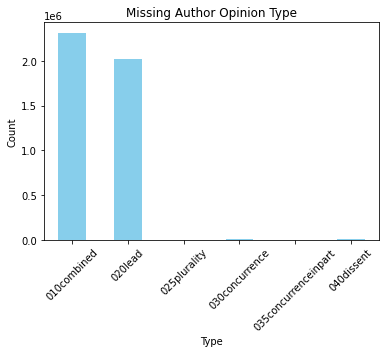

In [8]:
gb_type_auth.plot(kind='bar', color='skyblue')
plt.title('Missing Author Opinion Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
types_total = lower_court.groupby('type').count()['id']
types_total

type
010combined             3886441
020lead                 3601349
025plurality                 18
030concurrence           100985
035concurrenceinpart      30199
040dissent               194920
Name: id, dtype: int64

In [41]:
missing = lower_court_no_author.groupby('type').count()['id']
missing

type
010combined             2314457
020lead                 2019303
025plurality                  1
030concurrence             3703
035concurrenceinpart        149
040dissent                 8171
Name: id, dtype: int64

In [44]:
missing_percentage = (missing / types_total) * 100
missing_percentage

type
010combined             59.552094
020lead                 56.070739
025plurality             5.555556
030concurrence           3.666881
035concurrenceinpart     0.493394
040dissent               4.191976
Name: id, dtype: float64

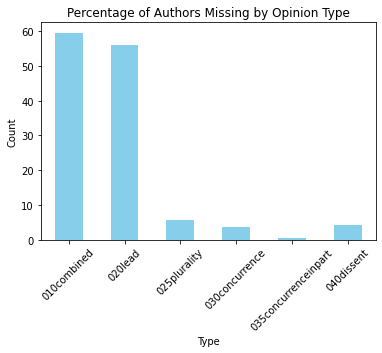

In [46]:
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Authors Missing by Opinion Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Missing Opinion Text: `decision_text`

For all of the lower court cases that had authors, which ones were missing the decision text

In [9]:
chunk_1_text = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_null_decision_text_chunk_1.csv')
chunk_2_text = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_null_decision_text_chunk_2.csv')
chunk_3_text = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_null_decision_text_chunk_3.csv')
chunk_4_text = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_null_decision_text_chunk_4.csv')
chunk_5_text = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_null_decision_text_chunk_5.csv')

In [10]:
null_text = pd.concat([chunk_1_text, chunk_2_text, chunk_3_text, chunk_4_text, chunk_5_text], ignore_index=True)
null_text

,resource_uri,id,absolute_url,cluster_id,cluster,author_id,author,joined_by,date_created,date_modified,...,sha1,page_count,download_url,local_path,extracted_by_ocr,opinions_cited,judges,judge,date_filed,decision_text
0,NaN,7361200,NaN,7441146,NaN,NaN,NaN,NaN,2022-07-27 17:02:34.843476+00,2022-07-27 17:02:34.843495+00,...,439c5cc1aefb8ca75a45a0cf1eafa74f90cf7340,NaN,http://courts.delaware.gov/Opinions/Download.a...,pdf/2022/07/27/ripple_v._delaware_board_of_nur...,f,NaN,Wallace J.,Wallace J.,2022-07-27,NaN
1,NaN,7796887,NaN,7853021,NaN,NaN,NaN,NaN,2022-08-01 19:02:01.394094+00,2022-08-01 19:02:01.39411+00,...,bf9c8e44376e480a6c26bebcd6b300489bc19e4d,NaN,http://courts.delaware.gov/Opinions/Download.a...,pdf/2022/08/01/in_re_morrow_park_holding_llc.pdf,f,NaN,Fioravanti V.C.,Fioravanti V.C.,2022-08-01,NaN
2,NaN,7797026,NaN,7853160,NaN,NaN,NaN,NaN,2022-08-02 13:01:17.142663+00,2022-08-02 13:01:17.142678+00,...,61a73fe9f8bacc9dc96b570ac6801546e6a8ce5b,NaN,https://ecf.cofc.uscourts.gov/cgi-bin/show_pub...,pdf/2022/08/01/insight_public_sector_inc._v._u...,f,NaN,Eleni M. Roumel,Eleni M. Roumel,2022-08-01,NaN
3,NaN,7797255,NaN,7853389,NaN,1844.0,NaN,NaN,2022-08-02 21:01:55.994198+00,2022-08-02 21:01:55.994215+00,...,9385693ce3b288d6d85977e3095b1fa1bdadb055,NaN,https://ecf.dcd.uscourts.gov/cgi-bin/show_publ...,pdf/2022/08/02/john_doe_i_v._exxon_mobil_corp.pdf,f,NaN,Judge Royce C. Lamberth,Judge Royce C. Lamberth,2022-08-02,NaN
4,NaN,7798308,NaN,7854442,NaN,8224.0,NaN,NaN,2022-08-05 16:10:54.308274+00,2022-08-05 16:10:54.308287+00,...,9dff844d7fe9f93c046d0a988dddffb8b129bb36,NaN,https://www.pacourts.us/assets/opinions/Superi...,pdf/2022/08/05/dhappart_s._v._first_commonweal...,f,NaN,"Bender, P.J.E.","Bender, P.J.E.",2022-08-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,NaN,4408765,NaN,4631512,NaN,2027.0,NaN,NaN,2019-06-20 20:00:30.533058+00,2020-03-03 13:11:00.662545+00,...,09cac7ca73b75a83a029d7c277279b952191e1a8,NaN,http://media.ca7.uscourts.gov/cgi-bin/rssExec....,pdf/2019/06/20/united_states_v._william_block.pdf,f,NaN,Manion,Manion,2019-06-20,NaN
881,NaN,4408787,NaN,4631534,NaN,NaN,NaN,NaN,2019-06-20 21:02:44.017657+00,2020-03-03 13:11:00.857524+00,...,5b3e49001938b5dd72eedfcff91de1a4fee55ef0,NaN,http://courts.delaware.gov/Opinions/Download.a...,pdf/2019/06/20/eagle_force_holdings_llc_v._sta...,f,NaN,Montgomery-Reeves V.C.,Montgomery-Reeves V.C.,2019-06-20,NaN
882,NaN,4444592,NaN,4667339,NaN,8283.0,NaN,NaN,2019-10-04 21:35:19.288056+00,2020-03-03 13:08:41.693258+00,...,534e2ef38aef5a9eaeb196415ee2fef6d2de0ca9,NaN,http://www.tsc.state.tn.us/sites/default/files...,pdf/2019/10/04/santeriaus_d._lavender_v._state...,f,NaN,Judge Timothy L. Easter,Judge Timothy L. Easter,2019-10-04,NaN
883,NaN,4408795,NaN,4631542,NaN,NaN,NaN,NaN,2019-06-20 22:00:28.041563+00,2020-03-03 13:11:00.919672+00,...,4bb2c54c779742f25debe51d660e6060159e2c78,NaN,http://media.ca7.uscourts.gov/cgi-bin/rssExec....,pdf/2019/06/20/william_white_v._todd_sloop.pdf,f,NaN,Per Curiam,Per Curiam,2019-06-20,NaN


In [12]:
null_text.count()

resource_uri          0
id                  885
absolute_url          0
cluster_id          885
cluster               0
author_id           463
author                0
joined_by             0
date_created        885
date_modified       885
author_str            0
per_curiam          885
joined_by_str         0
type                885
sha1                885
page_count            0
download_url        883
local_path          885
extracted_by_ocr    885
opinions_cited        0
judges              885
judge               885
date_filed          885
decision_text         0
dtype: int64

In [13]:
# Get rid of the rows where author was imputed with 'judges'
null_text_authors = null_text[null_text['author_str'].notnull()| null_text['author_id'].notnull()]
null_text_authors

,resource_uri,id,absolute_url,cluster_id,cluster,author_id,author,joined_by,date_created,date_modified,...,sha1,page_count,download_url,local_path,extracted_by_ocr,opinions_cited,judges,judge,date_filed,decision_text
3,NaN,7797255,NaN,7853389,NaN,1844.0,NaN,NaN,2022-08-02 21:01:55.994198+00,2022-08-02 21:01:55.994215+00,...,9385693ce3b288d6d85977e3095b1fa1bdadb055,NaN,https://ecf.dcd.uscourts.gov/cgi-bin/show_publ...,pdf/2022/08/02/john_doe_i_v._exxon_mobil_corp.pdf,f,NaN,Judge Royce C. Lamberth,Judge Royce C. Lamberth,2022-08-02,NaN
4,NaN,7798308,NaN,7854442,NaN,8224.0,NaN,NaN,2022-08-05 16:10:54.308274+00,2022-08-05 16:10:54.308287+00,...,9dff844d7fe9f93c046d0a988dddffb8b129bb36,NaN,https://www.pacourts.us/assets/opinions/Superi...,pdf/2022/08/05/dhappart_s._v._first_commonweal...,f,NaN,"Bender, P.J.E.","Bender, P.J.E.",2022-08-05,NaN
5,NaN,7798901,NaN,7855035,NaN,2209.0,NaN,NaN,2022-08-08 19:01:44.534355+00,2022-08-08 19:01:44.534377+00,...,82001eec6856445015f7e1060eae9d01cae7cc42,NaN,https://ecf.dcd.uscourts.gov/cgi-bin/show_publ...,pdf/2022/08/08/eig_energy_fund_xiv_l.p._v._pet...,f,NaN,Judge Amit P. Mehta,Judge Amit P. Mehta,2022-08-08,NaN
7,NaN,7799233,NaN,7855367,NaN,8224.0,NaN,NaN,2022-08-09 16:12:37.273813+00,2022-08-09 16:12:37.273827+00,...,0647efcaee6c0108af930ae80e01bf28bb975139,NaN,https://www.pacourts.us/assets/opinions/Superi...,pdf/2022/08/09/com._v._baggetta_r..pdf,f,NaN,"Bender, P.J.E.","Bender, P.J.E.",2022-08-09,NaN
12,NaN,7806744,NaN,7862878,NaN,8279.0,NaN,NaN,2022-09-06 21:10:16.021108+00,2022-09-06 21:10:16.021125+00,...,01b470b23509f85f47521fea94ce50b6b8f95407,NaN,https://www.tncourts.gov/sites/default/files/s...,pdf/2022/09/06/ida_steinberg_v._renea_steinber...,f,NaN,Presiding Judge J. Steven Stafford,Presiding Judge J. Steven Stafford,2022-09-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,NaN,4408709,NaN,4631456,NaN,8280.0,NaN,NaN,2019-06-20 17:48:38.224766+00,2020-03-03 13:11:05.912264+00,...,1e99cfb1cbe20b0c58d6410e246e402db76f2f6d,NaN,http://www.tsc.state.tn.us/sites/default/files...,pdf/2019/06/20/washington_county_education_ass...,f,NaN,"Judge Charles D. Susano, Jr.","Judge Charles D. Susano, Jr.",2019-06-20,NaN
879,NaN,4408782,NaN,4631529,NaN,2027.0,NaN,NaN,2019-06-20 21:00:31.9521+00,2020-03-03 13:11:00.813535+00,...,82347b4568b950018257e51b9c16fda361b64e8a,NaN,http://media.ca7.uscourts.gov/cgi-bin/rssExec....,pdf/2019/06/20/united_states_v._william_block_...,f,NaN,Manion,Manion,2019-06-20,NaN
880,NaN,4408765,NaN,4631512,NaN,2027.0,NaN,NaN,2019-06-20 20:00:30.533058+00,2020-03-03 13:11:00.662545+00,...,09cac7ca73b75a83a029d7c277279b952191e1a8,NaN,http://media.ca7.uscourts.gov/cgi-bin/rssExec....,pdf/2019/06/20/united_states_v._william_block.pdf,f,NaN,Manion,Manion,2019-06-20,NaN
882,NaN,4444592,NaN,4667339,NaN,8283.0,NaN,NaN,2019-10-04 21:35:19.288056+00,2020-03-03 13:08:41.693258+00,...,534e2ef38aef5a9eaeb196415ee2fef6d2de0ca9,NaN,http://www.tsc.state.tn.us/sites/default/files...,pdf/2019/10/04/santeriaus_d._lavender_v._state...,f,NaN,Judge Timothy L. Easter,Judge Timothy L. Easter,2019-10-04,NaN


The cases that were missing text that had an author documented exlusively only had `author_id`

In [14]:
gb_type_text = null_text_authors.groupby('type').count()['id']
gb_type_text

type
010combined    463
Name: id, dtype: int64

## Opinions with Less than 35 Tokens: `token_count` < 35

For all of the lower court cases that had authors and text, which ones were cases with less than 35 tokens

In [15]:
chunk_1_tokens = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_less_than_35_chunk_1.csv')
chunk_2_tokens = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_less_than_35_chunk_1.csv')
chunk_3_tokens = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_less_than_35_chunk_1.csv')
chunk_4_tokens = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_less_than_35_chunk_1.csv')
chunk_5_tokens = pd.read_csv('/scratch/amh9750/capstone/chunk_filter_preprocess/lc_less_than_35_chunk_1.csv')

/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
less_than_35 = pd.concat([chunk_1_tokens, chunk_2_tokens, chunk_3_tokens, chunk_4_tokens, chunk_5_tokens,])
less_than_35

,resource_uri,id,absolute_url,cluster_id,cluster,author_id,author,joined_by,date_created,date_modified,...,page_count,download_url,local_path,extracted_by_ocr,opinions_cited,judges,judge,date_filed,decision_text,token_count
0,NaN,7842685,NaN,7895231,NaN,NaN,NaN,NaN,2022-09-08 17:04:04.834586+00,2022-09-08 17:04:04.834614+00,...,NaN,NaN,NaN,t,NaN,Berdon,Berdon,1993-01-21,\nThe defendant’s petition for certification f...,27
1,NaN,7845684,NaN,7897737,NaN,NaN,NaN,NaN,2022-09-08 17:10:04.781207+00,2022-09-08 17:10:04.781234+00,...,NaN,NaN,NaN,t,NaN,Berdon,Berdon,1998-07-16,\nThe plaintiffs petition for certification fo...,25
2,NaN,7347230,NaN,7427419,NaN,NaN,NaN,NaN,2022-07-26 01:06:35.62719+00,2022-07-26 01:06:35.627216+00,...,NaN,NaN,NaN,t,NaN,"Huls, Smith",Smith,1961-12-19,"\nSMITH, J.\nI concur in the judgment but do n...",26
3,NaN,7347343,NaN,7427514,NaN,NaN,NaN,NaN,2022-07-26 01:06:48.533367+00,2022-07-26 01:06:48.533382+00,...,NaN,NaN,NaN,t,NaN,"Alarcon, Marshall",Alarcon,1975-07-25,"\nALARCON, J.\nI concur. The First Amendment r...",16
4,NaN,7845685,NaN,7897737,NaN,NaN,NaN,NaN,2022-09-08 17:10:04.782885+00,2022-09-08 17:10:04.7829+00,...,NaN,NaN,NaN,t,NaN,Berdon,Berdon,1998-07-16,"\nBERDON, J.,\ndissenting. I would grant the p...",33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57542,NaN,9465299,NaN,361179,NaN,NaN,NaN,NaN,2023-08-05 00:42:03.305071+00,2023-08-05 00:42:03.305088+00,...,NaN,NaN,NaN,f,NaN,"Higginbotham, Hill, Tjoflat",Hill,1979-01-05,"\nJAMES C. HILL, Circuit Judge,\nconcurring:\n...",33
57543,NaN,9465397,NaN,362483,NaN,NaN,NaN,NaN,2023-08-05 00:45:06.118848+00,2023-08-05 00:45:06.118859+00,...,NaN,NaN,NaN,f,NaN,"Feinberg, Mansfield, Per Curiam, Smith",Mansfield,1979-01-09,"\nMANSFIELD, Circuit Judge\n(concurring):\nI c...",14
57544,NaN,9465595,NaN,364190,NaN,NaN,NaN,NaN,2023-08-05 00:50:39.526051+00,2023-08-05 00:50:39.526062+00,...,NaN,NaN,NaN,f,NaN,"Gee, Godbold, Jones",Jones,1979-05-04,"\nJONES, Circuit Judge,\ndissenting:\nI adhere...",20
57545,NaN,9465625,NaN,364751,NaN,NaN,NaN,NaN,2023-08-05 00:51:34.931198+00,2023-08-05 00:51:34.931208+00,...,NaN,NaN,NaN,f,NaN,"Friendly, Oakes, Per Curiam, Smith",Friendly,1979-03-01,"\nFRIENDLY, Circuit Judge,\nconcurring:\nI con...",13


In [18]:
less_than_35.count()

resource_uri             0
id                  287735
absolute_url             0
cluster_id          287735
cluster                  0
author_id               20
author                   0
joined_by                0
date_created        287735
date_modified       287735
author_str          111580
per_curiam          287735
joined_by_str            0
type                287735
sha1                   920
page_count              20
download_url           870
local_path              20
extracted_by_ocr    287735
opinions_cited           0
judges              284295
judge               287735
date_filed          287735
decision_text       287735
token_count         287735
dtype: int64

In [19]:
# Get rid of the rows where author was imputed with 'judges'
less_than_35_authors = less_than_35[less_than_35['author_str'].notnull() | less_than_35['author_id'].notnull()]
less_than_35_authors

,resource_uri,id,absolute_url,cluster_id,cluster,author_id,author,joined_by,date_created,date_modified,...,page_count,download_url,local_path,extracted_by_ocr,opinions_cited,judges,judge,date_filed,decision_text,token_count
2,NaN,7347230,NaN,7427419,NaN,NaN,NaN,NaN,2022-07-26 01:06:35.62719+00,2022-07-26 01:06:35.627216+00,...,NaN,NaN,NaN,t,NaN,"Huls, Smith",Smith,1961-12-19,"\nSMITH, J.\nI concur in the judgment but do n...",26
3,NaN,7347343,NaN,7427514,NaN,NaN,NaN,NaN,2022-07-26 01:06:48.533367+00,2022-07-26 01:06:48.533382+00,...,NaN,NaN,NaN,t,NaN,"Alarcon, Marshall",Alarcon,1975-07-25,"\nALARCON, J.\nI concur. The First Amendment r...",16
4,NaN,7845685,NaN,7897737,NaN,NaN,NaN,NaN,2022-09-08 17:10:04.782885+00,2022-09-08 17:10:04.7829+00,...,NaN,NaN,NaN,t,NaN,Berdon,Berdon,1998-07-16,"\nBERDON, J.,\ndissenting. I would grant the p...",33
7,NaN,7842773,NaN,7895299,NaN,NaN,NaN,NaN,2022-09-08 17:04:16.068956+00,2022-09-08 17:04:16.068972+00,...,NaN,NaN,NaN,t,NaN,Berdon,Berdon,1993-02-11,"\nBerdon, J.,\ndissenting. I would grant the d...",17
9,NaN,7842815,NaN,7895339,NaN,NaN,NaN,NaN,2022-09-08 17:04:24.204163+00,2022-09-08 17:04:24.20418+00,...,NaN,NaN,NaN,t,NaN,Berdon,Berdon,1993-04-13,"\nBerdon, J.,\ndissenting. I would grant the p...",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57542,NaN,9465299,NaN,361179,NaN,NaN,NaN,NaN,2023-08-05 00:42:03.305071+00,2023-08-05 00:42:03.305088+00,...,NaN,NaN,NaN,f,NaN,"Higginbotham, Hill, Tjoflat",Hill,1979-01-05,"\nJAMES C. HILL, Circuit Judge,\nconcurring:\n...",33
57543,NaN,9465397,NaN,362483,NaN,NaN,NaN,NaN,2023-08-05 00:45:06.118848+00,2023-08-05 00:45:06.118859+00,...,NaN,NaN,NaN,f,NaN,"Feinberg, Mansfield, Per Curiam, Smith",Mansfield,1979-01-09,"\nMANSFIELD, Circuit Judge\n(concurring):\nI c...",14
57544,NaN,9465595,NaN,364190,NaN,NaN,NaN,NaN,2023-08-05 00:50:39.526051+00,2023-08-05 00:50:39.526062+00,...,NaN,NaN,NaN,f,NaN,"Gee, Godbold, Jones",Jones,1979-05-04,"\nJONES, Circuit Judge,\ndissenting:\nI adhere...",20
57545,NaN,9465625,NaN,364751,NaN,NaN,NaN,NaN,2023-08-05 00:51:34.931198+00,2023-08-05 00:51:34.931208+00,...,NaN,NaN,NaN,f,NaN,"Friendly, Oakes, Per Curiam, Smith",Friendly,1979-03-01,"\nFRIENDLY, Circuit Judge,\nconcurring:\nI con...",13


How are the opinions with less than 35 tokens distributed by opinion type?

In [20]:
gb_type_35 = less_than_35_authors.groupby('type').count()['id']
gb_type_35 

type
010combined               650
020lead                 93420
030concurrence           6565
035concurrenceinpart     1815
040dissent               9150
Name: id, dtype: int64

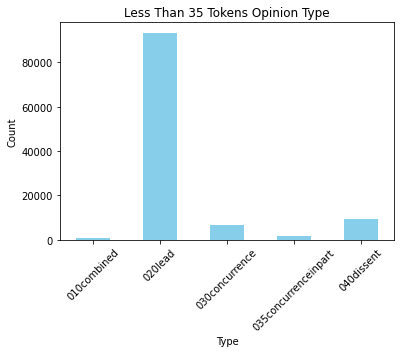

In [21]:
gb_type_35.plot(kind='bar', color='skyblue')
plt.title('Less Than 35 Tokens Opinion Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

What is the mean token count for the opinions by type?

In [22]:
gb_type_35_mean = less_than_35_authors.groupby('type').mean()['token_count']
gb_type_35_mean

type
010combined             27.030769
020lead                 15.587026
030concurrence          22.523229
035concurrenceinpart    28.639118
040dissent              23.220219
Name: token_count, dtype: float64

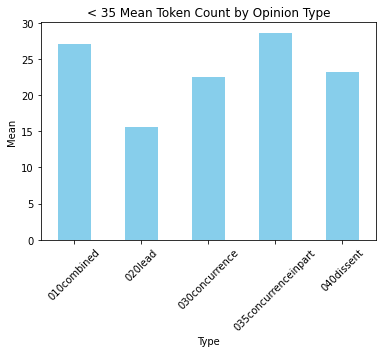

In [24]:
gb_type_35_mean.plot(kind='bar', color='skyblue')
plt.title('< 35 Mean Token Count by Opinion Type')
plt.xlabel('Type')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.show()